# Step1 Probelm Definition 
* You want to classify if the student will get the admission or not based on the GRE, GPA and Rank Scored by him. you are provided with the old records for the addmission 

# Step 2 Importing the lib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Step 3 Importing the data

In [4]:
data = pd.read_csv('Addmisiondata.csv')

In [5]:
data.head()

,admit,gre,gpa,rank
0,0,NaN,NaN,3
1,1,660.0,3.67,3
2,1,800.0,4.00,1
3,1,640.0,3.19,4
4,0,520.0,2.93,4


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit    400 non-null int64
gre      372 non-null float64
gpa      364 non-null float64
rank     400 non-null int64
dtypes: float64(2), int64(2)
memory usage: 12.6 KB


In [7]:
data.describe()

,admit,gre,gpa,rank
count,400.000000,372.000000,364.000000,400.00000
mean,0.317500,601.236559,3.410797,2.48500
std,0.466087,108.095884,0.378461,0.94446
min,0.000000,220.000000,2.420000,1.00000
25%,0.000000,520.000000,3.140000,2.00000
50%,0.000000,600.000000,3.430000,2.00000
75%,1.000000,680.000000,3.700000,3.00000
max,1.000000,800.000000,4.000000,4.00000


 * Few Observations that we made are,
     * The Max GRE score is 800
     * The Avg Rank Scored by students is 2
     * The Min GPA is 2
     


# Step 4 Handeling missing values 

In [36]:
data.isnull().sum()

admit    0
gre      0
gpa      0
rank     0
dtype: int64

In [35]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy='mean')
imputer.fit(data.iloc[:,1:3])
data.iloc[:,1:3]=imputer.transform(data.iloc[:,1:3])

# Step 4 Data Visualizations

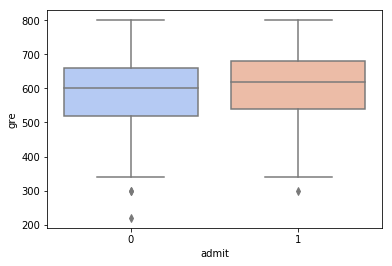

In [67]:
sns.boxplot('admit','gre',data=data,palette='coolwarm')

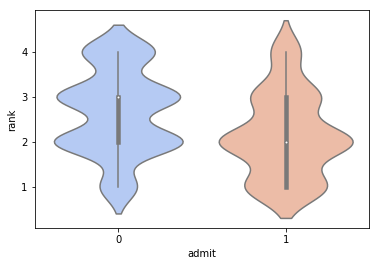

In [66]:
sns.violinplot('admit','rank',data=data, palette='coolwarm')

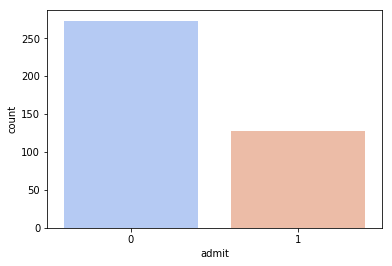

In [64]:
sns.countplot('admit',data=data,palette='coolwarm')

# Step 5 Train Test Split

In [40]:
X=data.iloc[:,1:]
y=data.iloc[:,0]

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=42)

# Step 5 Modeling the data

In [56]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [57]:
y_pred = gnb.predict(X_test)

In [84]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred)*100,'%')

70.0 %


# We are getting an accuracy of arround 70%, for each test tria split we get differnt values


In [83]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[122  17]
 [ 43  18]]


# Using K Fold Cross validation to get the average accuracy of our model

In [82]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(GaussianNB(),X_train,y_train,cv=10))*100

67.43233082706766